<a href="https://colab.research.google.com/github/minhhung250302/TrinhMinhHungUTE/blob/main/gao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/BTVN/Gao

/content/drive/MyDrive/Colab Notebooks/BTVN/Gao


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [4]:
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Gao/Train',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 137 images belonging to 5 classes.


In [5]:
training_set.class_indices

{'Gao Arborio': 0,
 'Gao Ipsala': 1,
 'Gao Jasmine': 2,
 'Gao Karacadag': 3,
 'Gao basmati': 4}

In [6]:
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/BTVN/Gao/Val',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 111 images belonging to 5 classes.


In [7]:
validation.class_indices

{'Gao Arborio': 0,
 'Gao Ipsala': 1,
 'Gao Jasmine': 2,
 'Gao Karacadag': 3,
 'Gao basmati': 4}

In [8]:

model= Sequential()

model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))

model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))

model.add(Dense(5,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [11]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(training_set,epochs=20,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=20)])

Epoch 1/20
5/5 [==============================] - 26s 6s/step - loss: 1.4443 - accuracy: 0.4453 - val_loss: 0.9091 - val_accuracy: 0.7477
Epoch 2/20
5/5 [==============================] - 2s 413ms/step - loss: 0.9073 - accuracy: 0.6642 - val_loss: 0.6421 - val_accuracy: 0.7658
Epoch 3/20
5/5 [==============================] - 2s 413ms/step - loss: 0.7256 - accuracy: 0.6715 - val_loss: 0.5418 - val_accuracy: 0.7658
Epoch 4/20
5/5 [==============================] - 2s 407ms/step - loss: 0.5918 - accuracy: 0.7591 - val_loss: 0.4553 - val_accuracy: 0.8288
Epoch 5/20
5/5 [==============================] - 2s 408ms/step - loss: 0.5407 - accuracy: 0.7956 - val_loss: 0.5018 - val_accuracy: 0.7838
Epoch 6/20
5/5 [==============================] - 2s 470ms/step - loss: 0.5451 - accuracy: 0.7737 - val_loss: 0.5008 - val_accuracy: 0.7117
Epoch 7/20
5/5 [==============================] - 2s 409ms/step - loss: 0.6239 - accuracy: 0.7518 - val_loss: 0.4490 - val_accuracy: 0.8108
Epoch 8/20
5/5 [======

In [14]:
Score=model.evaluate(training_set,verbose=0)
print('Sai', Score[0])
print('Chinh xác ', Score[1])

Sai 0.3147377669811249
Chinh xác  0.8759124279022217


In [16]:
model.save("Nhandiengao.h5")

In [20]:
model_ANN=load_model("Nhandiengao.h5")

1/1 [==============================] - 0s 27ms/step
Gao basmati


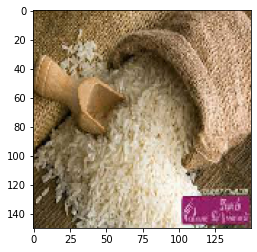

In [22]:
img=load_img('/content/Basmati (47).jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
img=np.expand_dims(img,axis=0)
result=model_ANN.predict(img)
if round(result[0][0])==1:
  prediction='Gao Arborio'
if round(result[0][1])==1:
  prediction='Gao Ipsala'
if round(result[0][2])==1:
  prediction='Gao Jasmine'
if round(result[0][3])==1:
  prediction='Gao Karacadag' 
if round(result[0][4])==1:
  prediction='Gao basmati'
print(prediction)